In [16]:
pwd

'/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF+Newton/Server_all_experiments/recursive_all'

In [17]:
import numpy as np
import matplotlib.pyplot as plt
new_pred_k = np.load("new_predictions_emo_bertT_I100_D1.npy", allow_pickle=True).squeeze()
app_k = np.array(np.load("NT_app_k_emo_bertT_I100_D1.npy", allow_pickle=True).squeeze())
old_prediction = np.load("/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/BERT/Bert_SST/Bert_linear_emo/old_predictions.npy", allow_pickle=True).squeeze()
#exact_ks = np.load("exact_ks_IP.npy", allow_pickle=True)
#pred = np.load("pred.npy", allow_pickle=True)
app_k.shape

(1003,)

In [18]:
pred = old_prediction

In [19]:
new_pred_k_nonon = [new_pred_k[i] for i in range(len(new_pred_k)) if new_pred_k[i] != None]
len(new_pred_k_nonon)

831

# can find smallest k

In [20]:
app_k_nonon = [app_k[i] for i in range(len(new_pred_k)) if new_pred_k[i] != None]
len(new_pred_k_nonon)

831

In [21]:
np.mean(app_k_nonon)

326.8231046931408

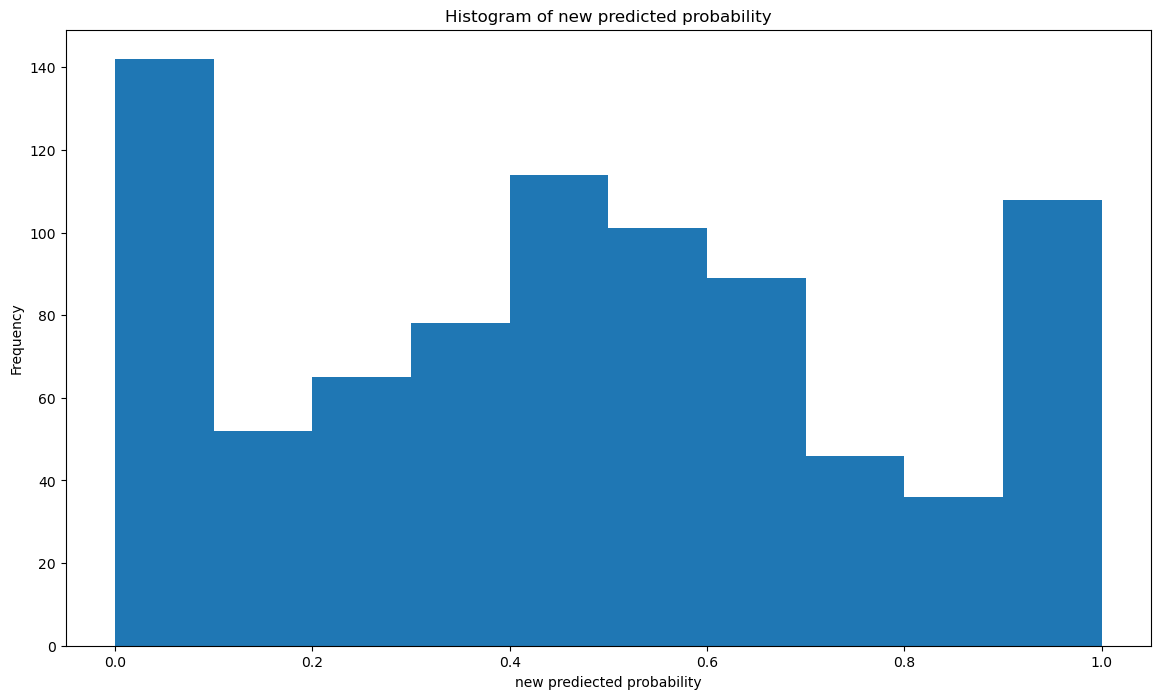

In [22]:
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(new_pred_k_nonon, bins=10)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

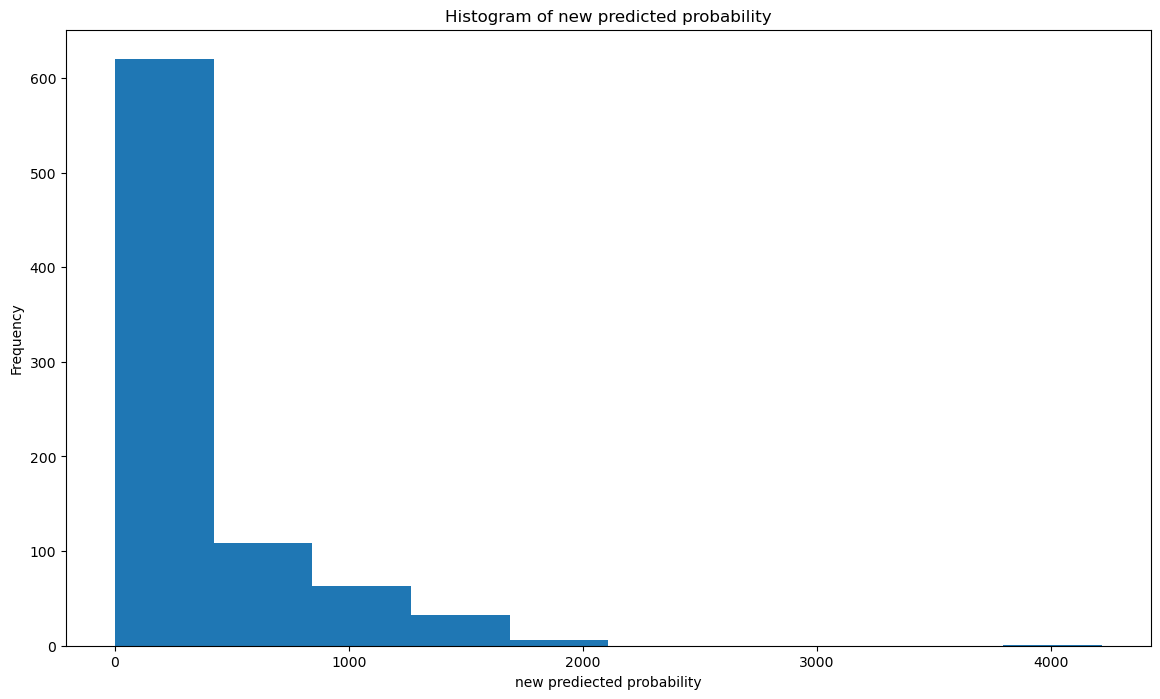

In [23]:

plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(app_k_nonon, bins=10)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

In [24]:
flips = np.zeros((len(new_pred_k), 1))
diff = np.zeros((len(new_pred_k), 1))

#1: flip the label, 0: not flip the label, 2: cannot found k
for i in range(1298):
    print("i", i)
    if app_k[i] != None:
        if np.round(pred[i].item()) != np.round(new_pred_k[i].item()):
            flips[i, :] = 1
        else:
            flips[i, :] = 0  
            
        diff[i] = new_pred_k[i] - 0.5
        
        print("old", pred[i].item())
        print("new", new_pred_k[i].item())
        print("appro k", app_k[i])
        print("flip label", flips[i, :])
        print()
        
    else:
        flips[i, :] = 2
        #print("appro k", app_k[i])

i 0
old 0.5608479913294804
new 0.385435930631118
appro k 18
flip label [1.]

i 1
old 0.8977539867734747
new 0.0010934766868455235
appro k 1381
flip label [1.]

i 2
old 0.20004583627873895
new 0.7828380711745964
appro k 341
flip label [1.]

i 3
i 4
old 0.1847119278486094
new 0.9340642338434391
appro k 668
flip label [1.]

i 5
old 0.5708803338314903
new 0.33420008264690815
appro k 30
flip label [1.]

i 6
i 7
old 0.4258912598831898
new 0.6442249832821184
appro k 22
flip label [1.]

i 8
old 0.14115717701505717
new 0.9861201279552246
appro k 543
flip label [1.]

i 9
old 0.6946777508762827
new 0.46043236199185295
appro k 88
flip label [1.]

i 10
old 0.4314824920128335
new 0.5959707386433594
appro k 25
flip label [1.]

i 11
old 0.8212475774191397
new 0.04561140651923022
appro k 366
flip label [1.]

i 12
i 13
old 0.21992586009384366
new 0.7262706310012544
appro k 186
flip label [1.]

i 14
old 0.22139425147009656
new 0.8289210796761979
appro k 254
flip label [1.]

i 15
old 0.7387070844386979
ne

IndexError: index 1003 is out of bounds for axis 0 with size 1003

In [25]:
# flip the label
num_flip = np.sum([flips[i] == 1 for i in range(len(new_pred_k))])
num_flip

714

In [26]:
app_k.shape

(1003,)

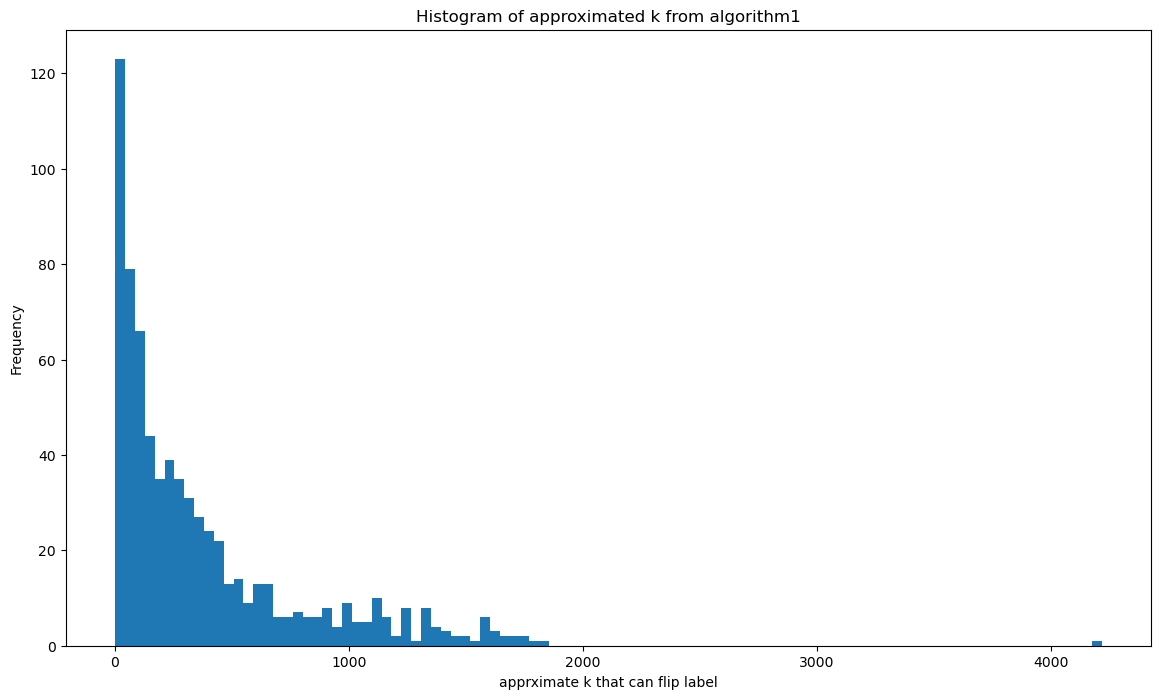

In [27]:

flip_idx = np.array([i for i in range(len(new_pred_k)) if flips[i] == 1 ])
K_flip = app_k[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

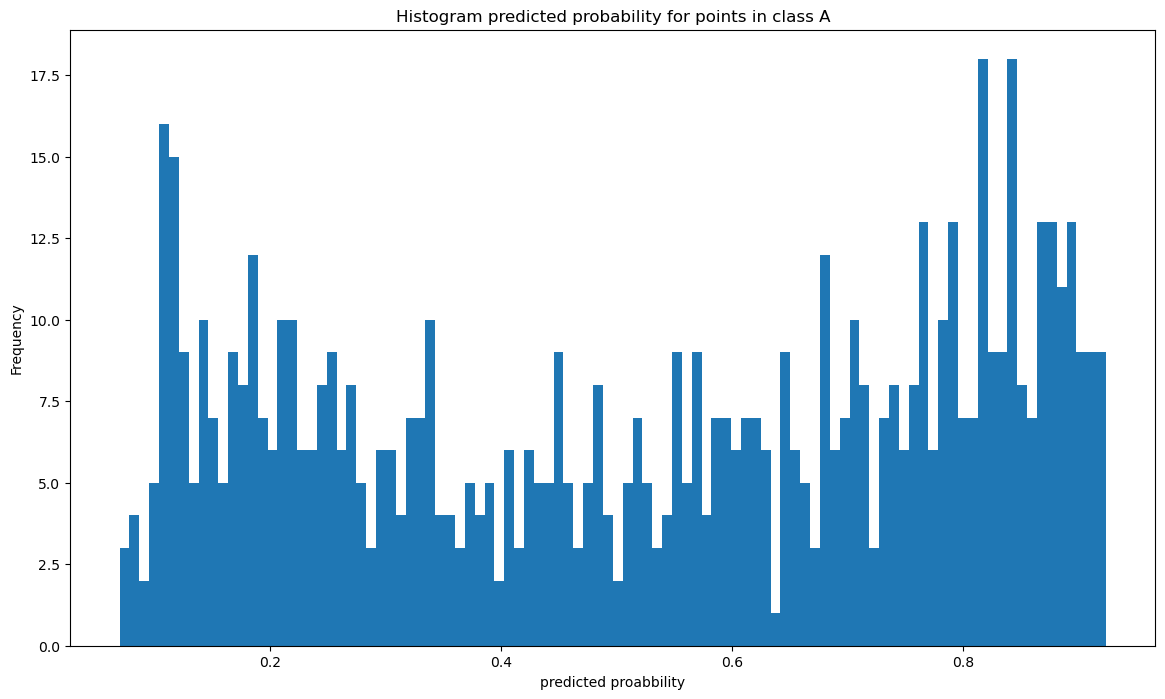

In [28]:
old_prediction
K_flip = old_prediction[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("predicted proabbility")
plt.ylabel("Frequency")
plt.title("Histogram predicted probability for points in class A")
plt.show()

In [29]:
# not flip the label
num_noflip = np.sum([flips[i] == 0 for i in range(len(new_pred_k))])
num_noflip

117

In [30]:
# diff for those flip the lable
diff1=[diff[i] for i in range(len(new_pred_k)) if flips[i] == 1]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.2858391851873927, 0.027494660251061755)

In [31]:
# diff for those not flip the lable
diff1=[diff[i] for i in range(len(new_pred_k)) if flips[i] == 0]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.06561834923675164, 0.003537167895482989)